<a href="https://colab.research.google.com/github/rayner-p/Simulacion/blob/main/ExamenSimulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install TwitterSearch

  Created wheel for TwitterSearch: filename=TwitterSearch-1.0.2-cp37-none-any.whl size=18462 sha256=719a23051a8b8500512962ef9ad5f42aad2352d1f2b21f8f23d9d8e4392ec1b8
  Stored in directory: /root/.cache/pip/wheels/4e/98/87/016442cb92cf56a0e262e7d68ad00b3701928e247d04955fdb
Successfully built TwitterSearch


In [ ]:
from TwitterSearch import *
import time
import json
import tweepy
import pandas as pd
# Definición diccionario:

def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None
try:
    consumer_key = 'ZxWvLYiEjuaYF2tcLJ8Bxs1rx'
    consumer_secret = 'HqjuFRM78m9ay274oiKksddn5x9VAowOQeGcOKoBn4q2Bt6dOP'
    access_token = '805863249191178241-DNW0knLtRLjLPGBull9Q5tFmSvypNO7'
    access_token_secret = 'p10rsJOxiPKHSQGLZNAx3J10yS9zQOEri4nAL9SFz7J0f'  
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    # con este objeto realizaremos todas las llamadas al API
    #print (json.dumps(tweet._json, indent=4))
    api = tweepy.API(auth,
                     wait_on_rate_limit=True,
                     wait_on_rate_limit_notify=True)
    conta =0
    usuarios=[]
    enlaces=[]
    descripcion=[]
    total_palabras=[]
    hashtags=[]
    num_retweet=[]
    num_favor=[]
    print('antes')
    for tweet in tweepy.Cursor(api.search, q="Guillermo Lasso",tweet_mode="extended").items(8000):
      #print('usuario ->', tweet.user.screen_name,': enlaces externos ->' ,tweet.user.url)
      #print('texto ->', tweet.full_text)
      #print(  % ( tweet['user']['screen_name']['url']['listed_count'], tweet['text']))  
      #print('hashtag ->', tweet._json['entities']['hashtags'])
      #print('conteo retuit ->',tweet.retweet_count, 'favoritos  ->', tweet.favorite_count)
      user= tweet.user.screen_name
      usuarios.append(user)
      url = tweet.user.url
      enlaces.append(url)
      texto = tweet.full_text
      descripcion.append(texto)
      total_palabras.append(len(texto)-1)
      hashtag= tweet._json['entities']['hashtags']
      hashtags.append(hashtag)
      retuit= tweet.retweet_count
      num_retweet.append(retuit)
      favorito =  tweet.favorite_count
      num_favor.append(favorito)
      conta=conta+1
      time.sleep(2)
      print(conta)
    print('fin primero')
except TwitterSearchException as e: 
  print('error al hacer el scraping' + e)

Streaming output truncated to the last 5000 lines.
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191

In [ ]:
print(len(usuarios))

8000


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

datos = {'usuario': usuarios, 'enlace_externo': enlaces,'texto_descriptivo':descripcion,'total_palabras':total_palabras, 'hashtag':hashtags,'retweet':num_retweet,'favorito':num_favor}
df_datos = pd.DataFrame(datos)
df_datos.to_csv(r'/content/drive/MyDrive/Simulacion/tweet2.csv',  index=False)  


NameError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Simulacion/tweet2.csv')

df.columns = ['usuario','enlace_externo','texto_descriptivo','total_palabras', 'hashtag','retweet','favorito']


df.shape

(8001, 7)

In [ ]:
df.head()

,usuario,enlace_externo,texto_descriptivo,total_palabras,hashtag,retweet,favorito
0,usuario,enlace_externo,texto_descriptivo,total_palabras,hashtag,retweet,favorito
1,Raagsanc,NaN,RT @eluniversocom: De la Fundación Ecuador Lib...,139,[],58,0
2,CEDENMA,https://t.co/4outo4EZnw,Este #DiaMundialDelMedioAmbiente revisamos los...,252,"[{'text': 'DiaMundialDelMedioAmbiente', 'indic...",0,0
3,SaraiLpe,NaN,@RonSangines @LassoGuillermo Copiando o no cop...,201,[],0,0
4,patoivann,NaN,@pjfreile @LassoGuillermo @simoncueva Tenemos ...,310,[],0,0


In [ ]:
df.fillna(0, inplace=True)
df.describe()

,usuario,enlace_externo,texto_descriptivo,total_palabras,hashtag,retweet,favorito
count,8001,8001,8001,8001,8001,8001,8001
unique,4528,638,2195,309,418,136,90
top,HaroldCaiced,0,RT @eluniversocom: El presidente Guillermo Las...,139,[],0,0
freq,119,6734,491,5164,5968,1208,7326


In [ ]:
df.drop([''])

[]
1 1 1


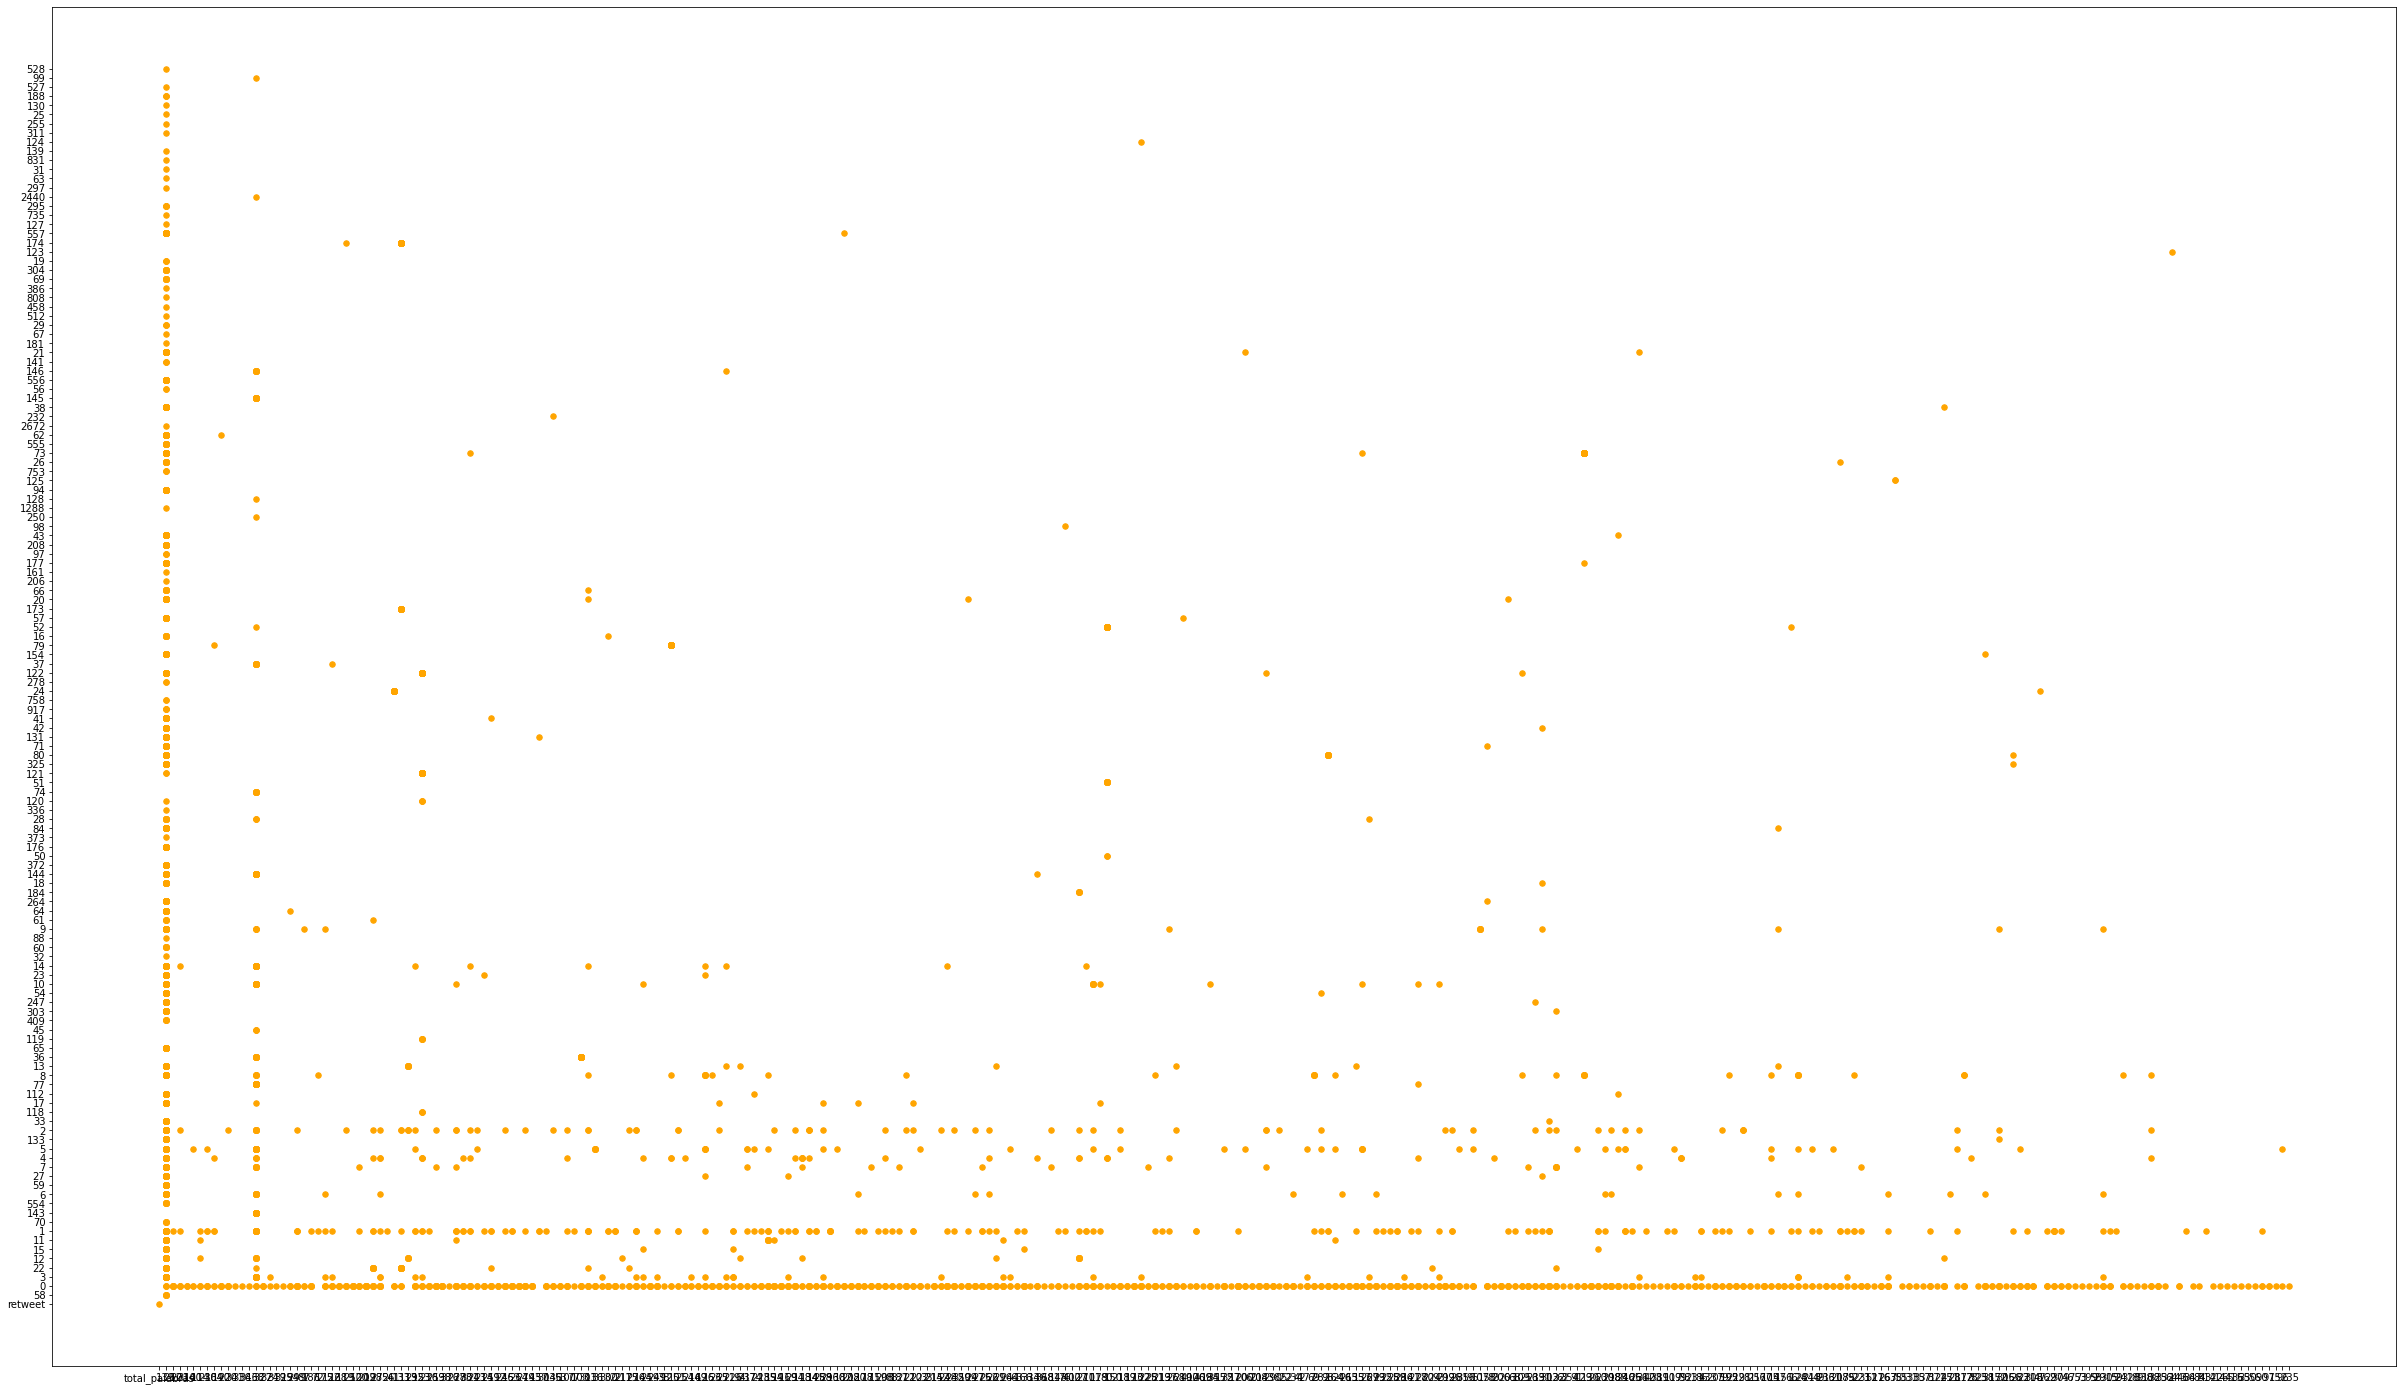

In [ ]:
#filtered_data = df[(df['total_palabras']) & (df['retweet'])]
import matplotlib.pyplot as pp
from pandas import Series
%matplotlib inline
import numpy as np
from numpy.random import randn


colores=['orange']
tamanios=[30,60]

f1 = df['total_palabras'].values
f2 = df['retweet'].values

pp.scatter(f1, f2, c=colores, s=tamanios[0])
pp.gcf().set_size_inches(42, 25)

pp.show()

#Regresión


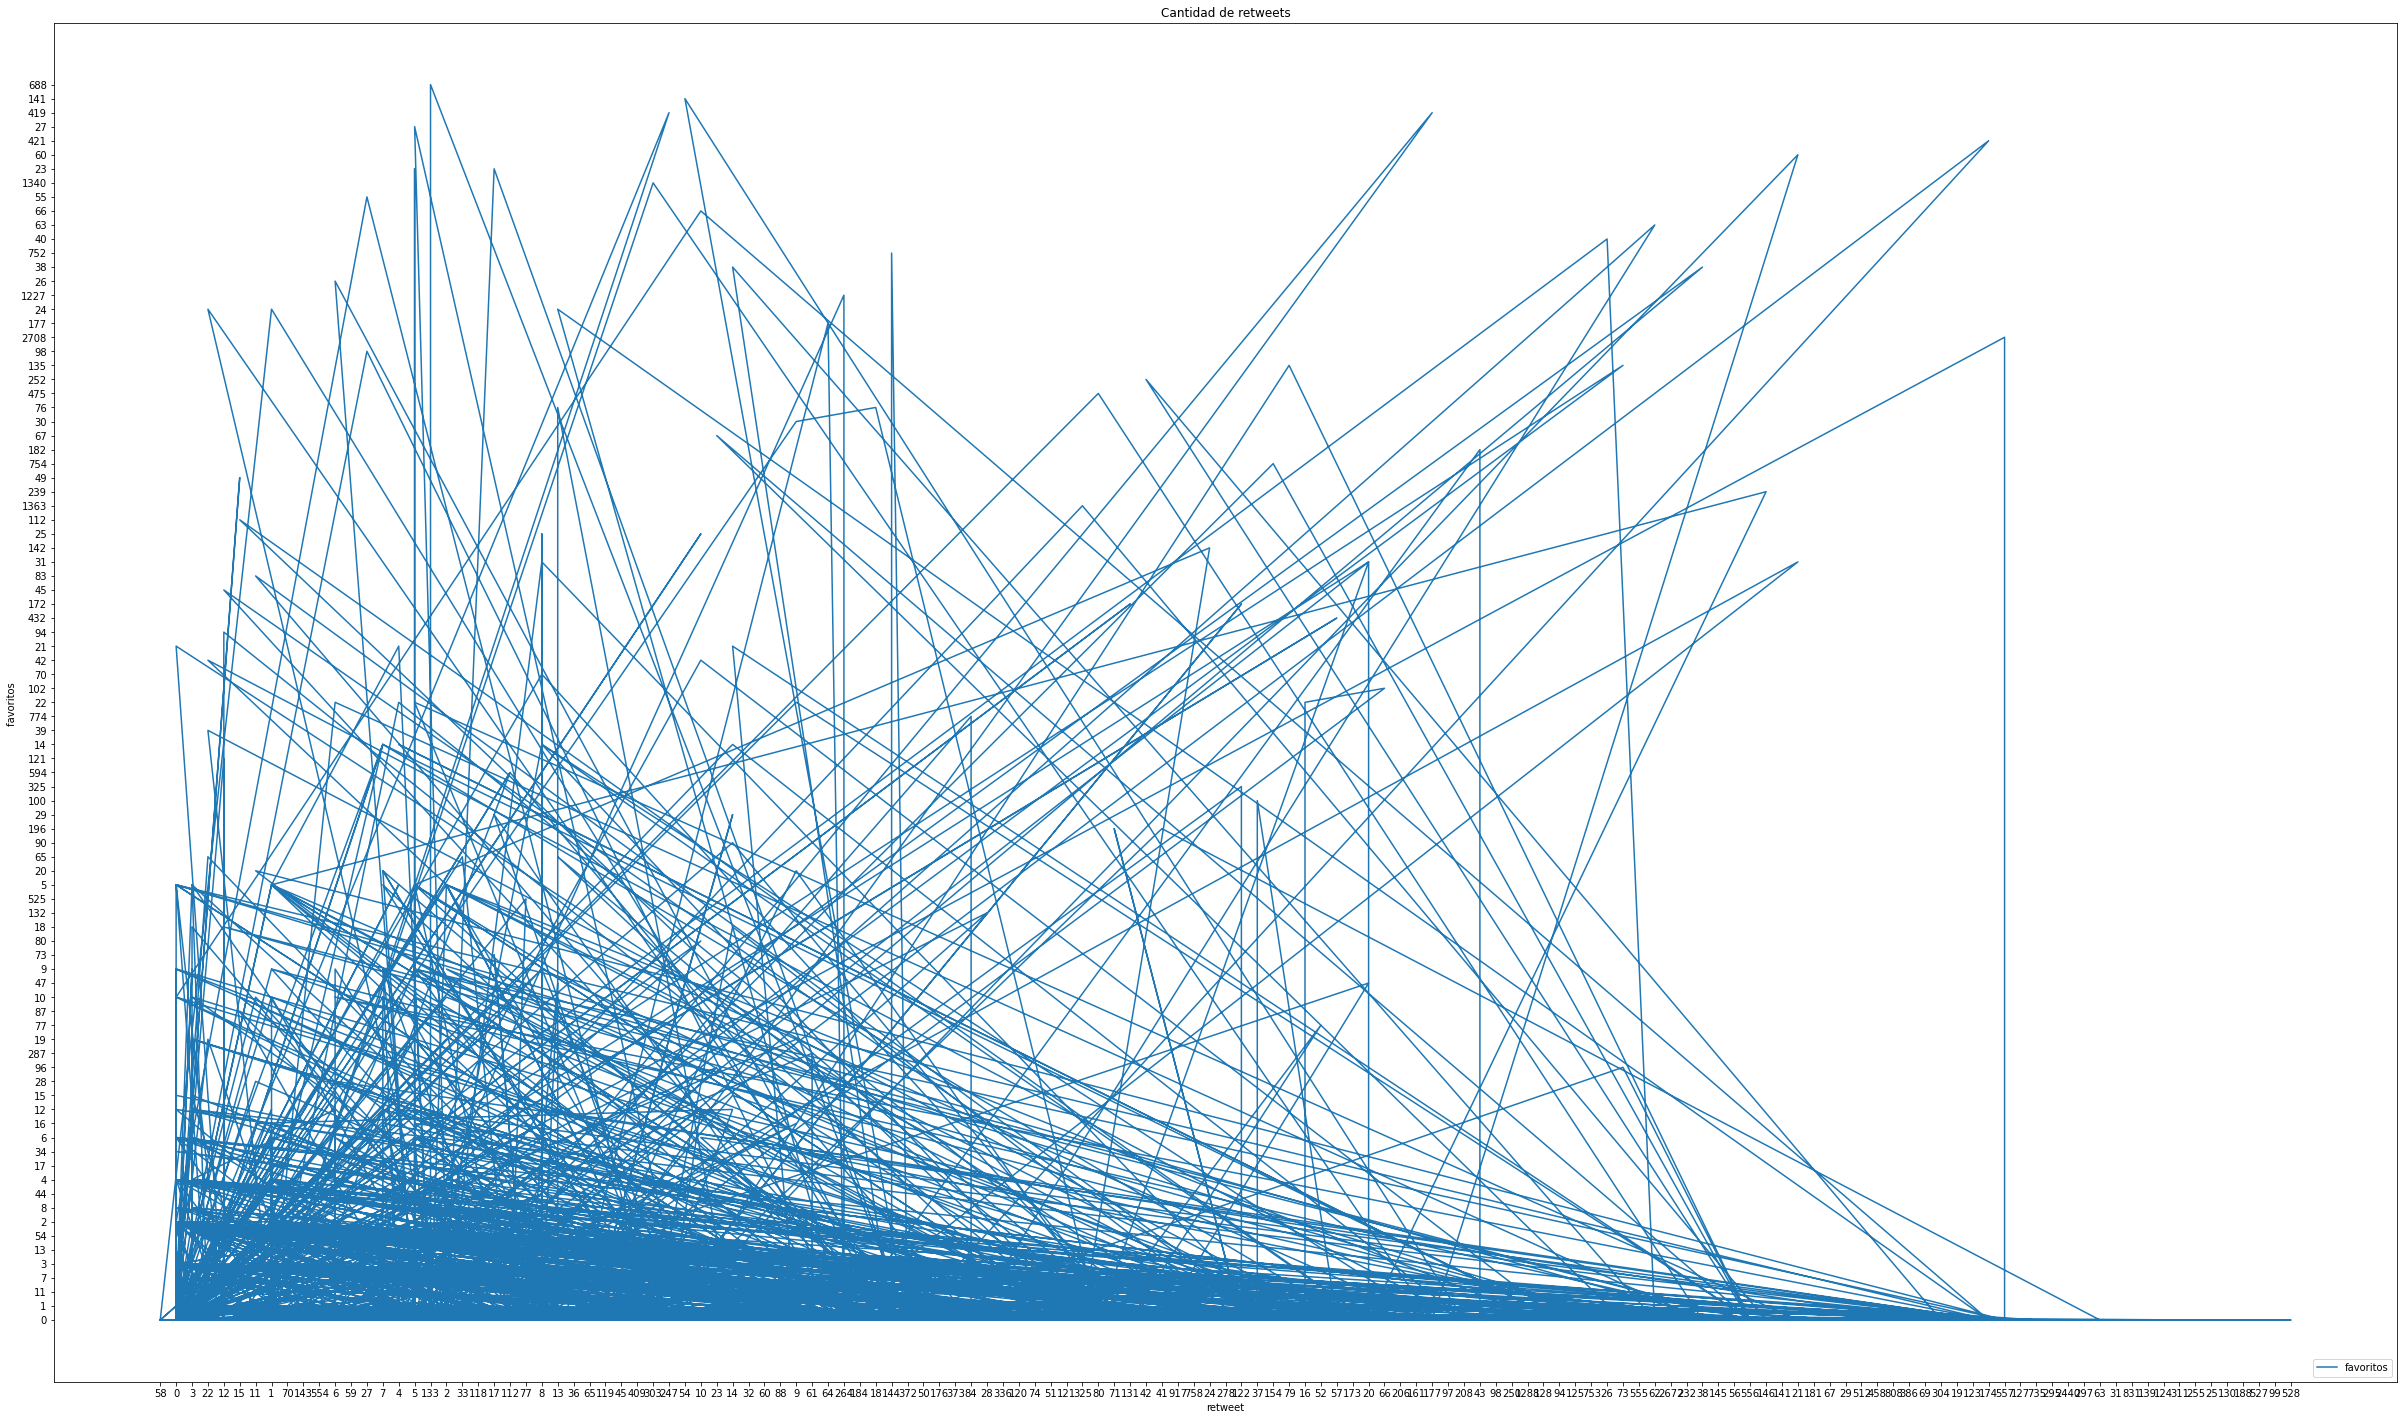

In [ ]:

pp.plot(df.retweet[1:], df.favorito[1:])
pp.title('Cantidad de retweets') 
pp.ylabel('favoritos ')
pp.xlabel('retweet')
pp.legend(['favoritos','retweet'], loc='lower right')
pp.gcf().set_size_inches(42, 25)
pp.show()

In [ ]:
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model

total_datos = df.loc[:,['total_palabras','retweet', 'favorito']]


In [ ]:
X_train=  (total_datos.total_palabras[1:].astype(np.float64))
y_train=  (total_datos.retweet[1:].astype(np.float64))

#X_train = np.array(dataX)
#y_train = df['retweet'].values
#obejto regresion
regres = linear_model.LinearRegression()

regres.fit(np.array(X_train).reshape(-1, 1) ,y_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regres.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Intercepcion: \n', regres.intercept_)
# Error Cuadrado Medio
prediccion = regres.predict([[150]])
print('prediccion-->',int(prediccion))
print(' ')


Coefficients: 
 [-0.794326]
Intercepcion: 
 246.43523804208843
prediccion--> 127
 


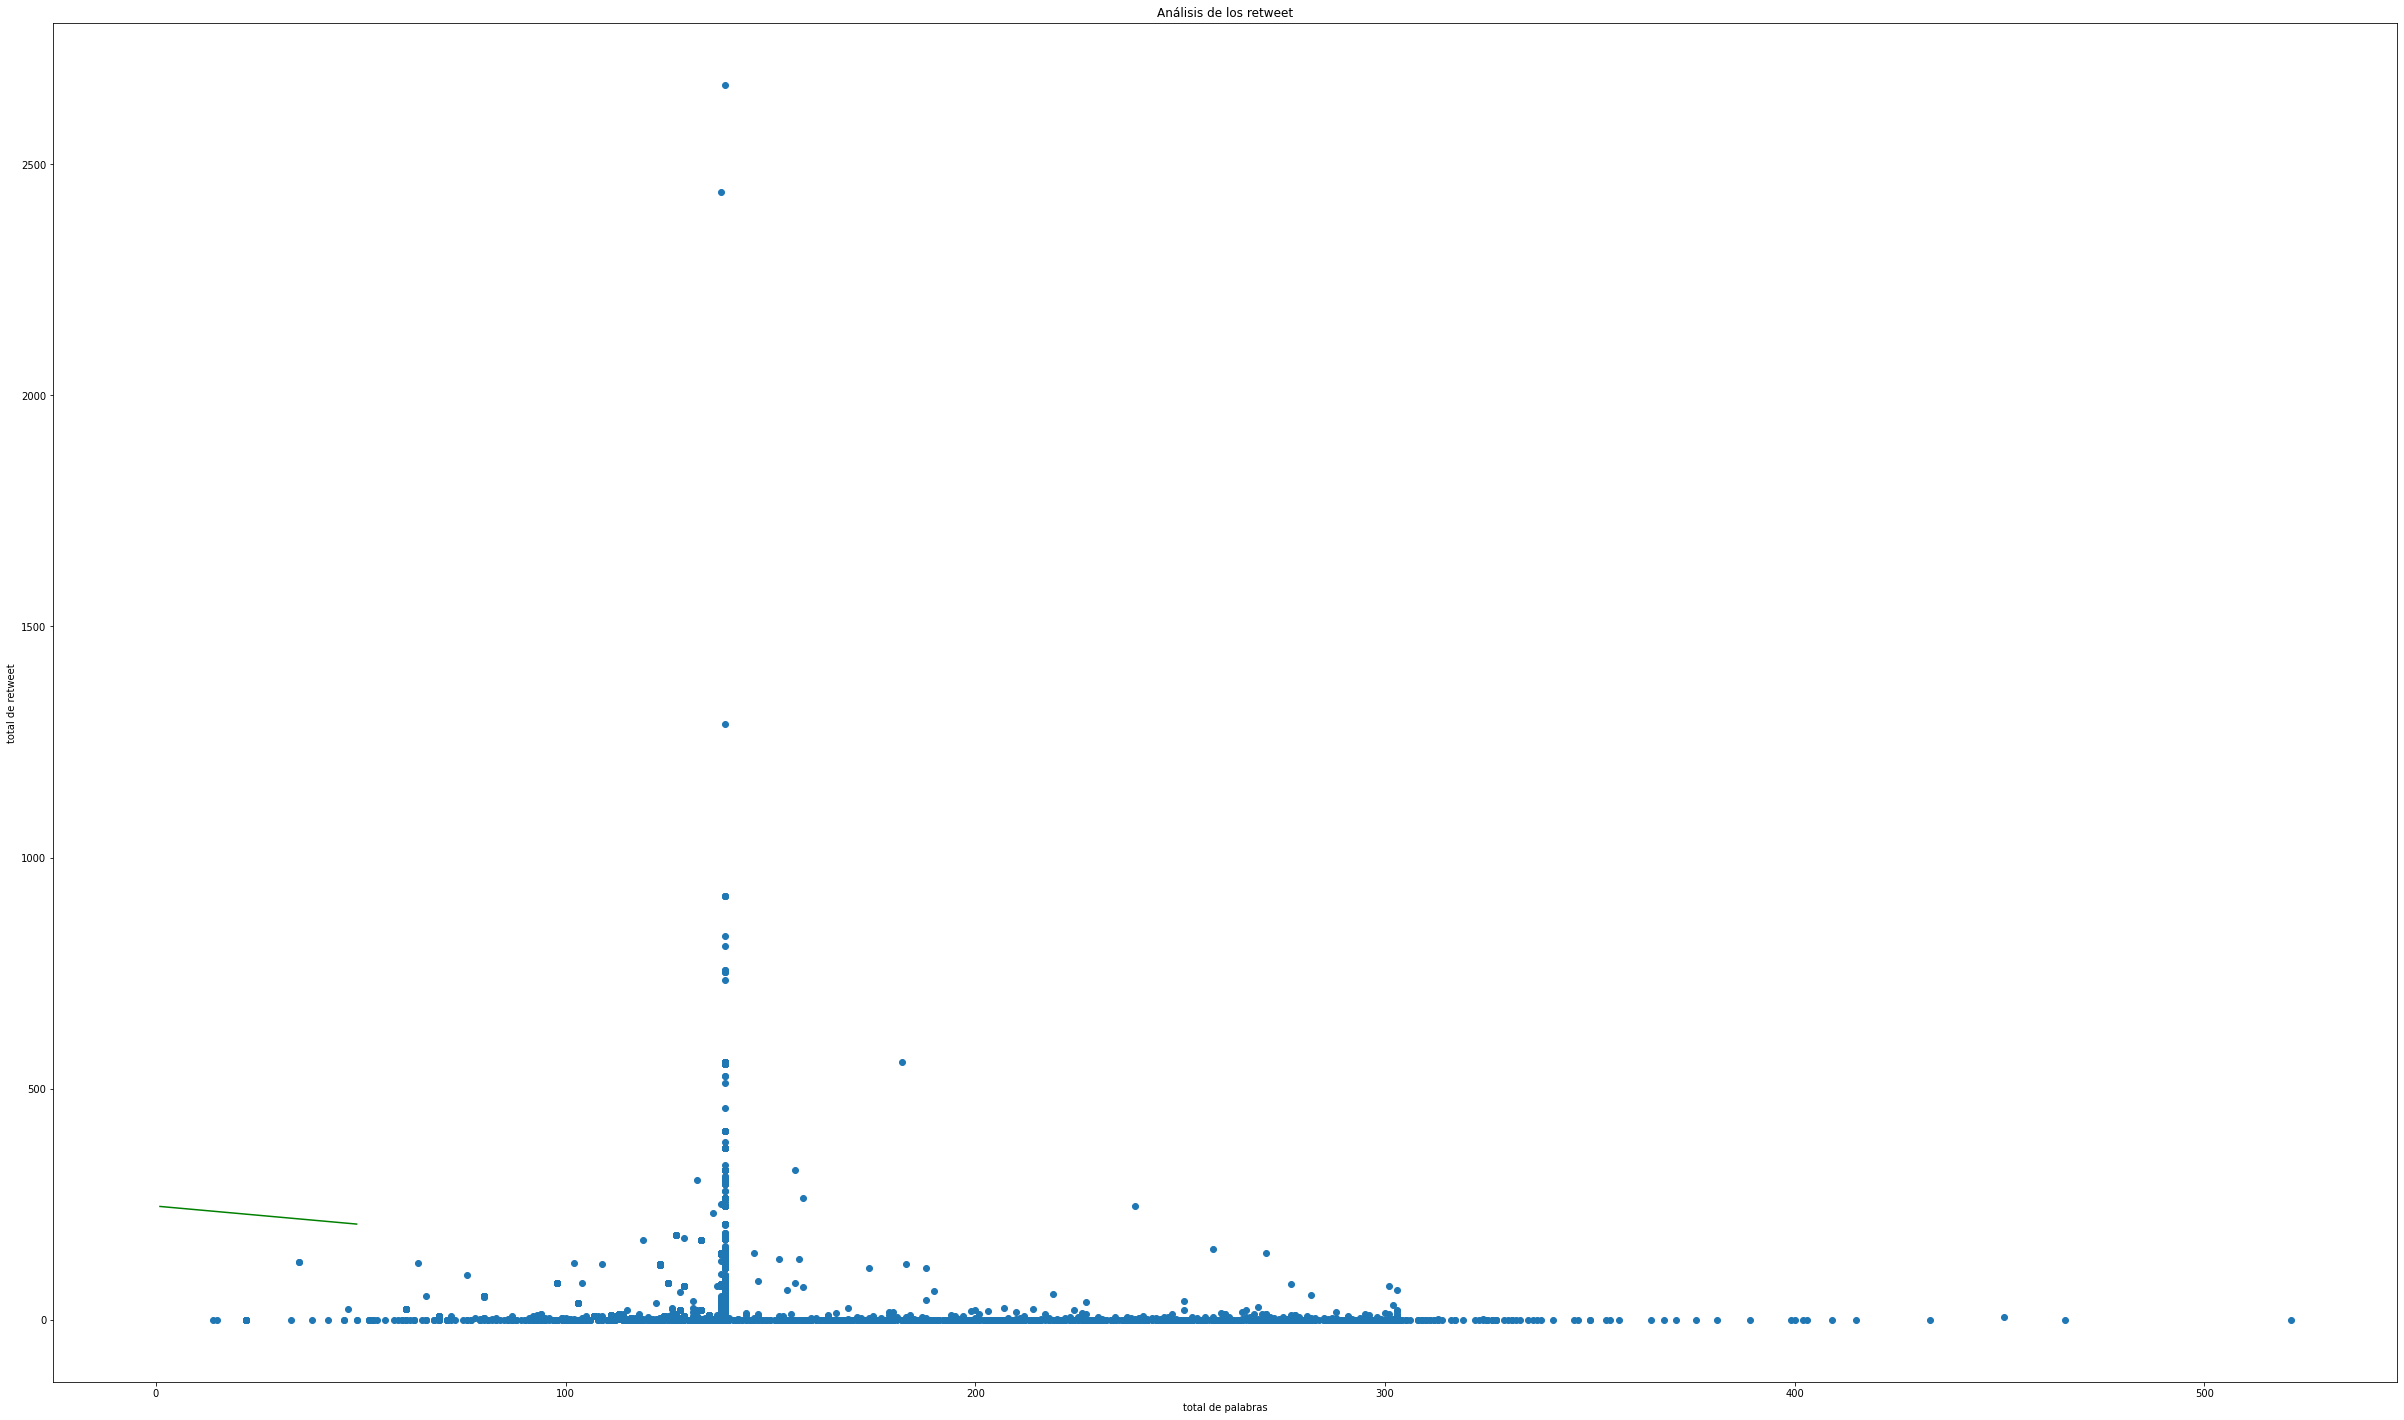

In [ ]:
pp.scatter(X_train, y_train)
x_real = np.array(range(1, 50))
pp.gcf().set_size_inches(42, 25)
pp.plot(x_real, regres.predict(x_real.reshape(-1, 1)), color='green')
pp.title('Análisis de los retweet')
pp.xlabel('total de palabras')
pp.ylabel('total de retweet')
pp.show()